In [138]:
# import libraries

# graphing libs
import matplotlib.pyplot as plt
from matplotlib import colors
#%matplotlib inline
#plt.rcParams['figure.figsize'] = [12.0, 8.0]
plt.rcParams['figure.figsize'] = [6.0, 4.0]
import seaborn as sns
sns.set(color_codes=False)
sns.set_style("darkgrid")

# modeling libs
import pandas as pd
import numpy as np
import sys
from scipy import stats, integrate

#text libs
from sklearn.feature_extraction.text import TfidfVectorizer

#Sparse Pipeline libs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

#Feature Engineering libs
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import re, string

In [125]:
# import datafiles

transit_loc = 'train.csv'
df = pd.read_csv(transit_loc)

#import cursefile
curse_loc = 'curses.txt'
curses = pd.read_csv(curse_loc)
curses.columns = ["curse"]
curses.head(3)

,curse
0,abo
1,abortion
2,abuse


In [44]:
# print a preview of the first 5 entries in the dataset

df.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [45]:
# print a preview of the last 5 entries in the dataset

df.tail(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [46]:
# print basic statistics about the dataset

df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
# get info on attribute type

df.dtypes

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

In [48]:
# get info on dataset size

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [129]:
# create comment length attribute

def add_comment_length(row):
    comment_length = len(row['comment_text'])
    return comment_length

df['comment_length'] = df.apply(add_comment_length, axis=1)
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,65
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,115
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,472
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,70


In [50]:
# comment length statistics

df['comment_length'].describe()

count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: comment_length, dtype: float64

In [51]:
# check to ensure nominal vars are error free

unique_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
attribute_vals = {}
for col in unique_cols:
    attribute_vals[col] = df[col].unique()
    
attribute_vals

{'identity_hate': array([0, 1]),
 'insult': array([0, 1]),
 'obscene': array([0, 1]),
 'severe_toxic': array([0, 1]),
 'threat': array([0, 1]),
 'toxic': array([0, 1])}

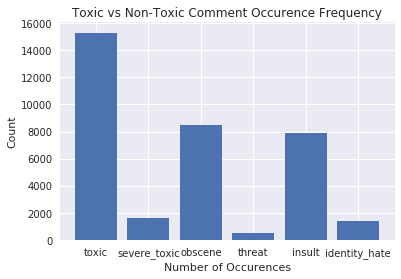

In [52]:
# plot occurance frequency of toxic attributes

unique_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
toxic_freqs = {}
for col in unique_cols:
    toxic_freqs[col] = df[col].value_counts()[1]

data = list(toxic_freqs.values())

fig, ax = plt.subplots()
index = np.arange(len(data))

ax.bar(index, data)
ax.set_xlabel('Number of Occurences')
ax.set_ylabel('Count')
ax.set_title('Toxic vs Non-Toxic Comment Occurence Frequency')
ax.set_xticks(index)
ax.set_xticklabels(list(toxic_freqs.keys()))
plt.show()

In [130]:
# create is_toxic? attribute

def add_is_toxic(row):
    unique_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
    is_toxic = False
    for col in unique_cols:
        if(row[col] == 1):
            is_toxic = True
            break
    return is_toxic

df['is_toxic?'] = df.apply(add_is_toxic, axis=1)
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_length,is_toxic?
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,False
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,False
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,False
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,False
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,False
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,65,False
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44,True
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,115,False
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,472,False
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,70,False


In [54]:
# create number_of_toxic_occurences attribute

def add_toxic_count(row):
    unique_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
    num_toxic = 0
    for col in unique_cols:
        if(row[col] == 1):
            num_toxic += 1
    return num_toxic

df['toxic_count'] = df.apply(add_toxic_count, axis=1)
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_length,is_toxic?,toxic_count
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,False,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,False,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,False,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,False,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,False,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,65,False,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44,True,4
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,115,False,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,472,False,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,70,False,0


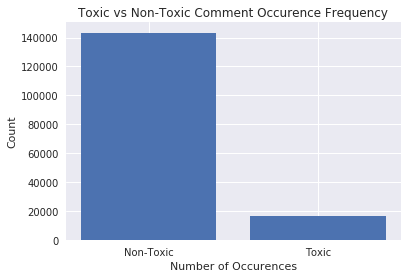

In [55]:
# get frequencies of toxic/non-toxic comments

data = df["is_toxic?"].value_counts()

fig, ax = plt.subplots()
index = np.arange(len(data))

ax.bar(index, data)
ax.set_xlabel('Number of Occurences')
ax.set_ylabel('Count')
ax.set_title('Toxic vs Non-Toxic Comment Occurence Frequency')
ax.set_xticks(index)
ax.set_xticklabels(('Non-Toxic', 'Toxic'))
plt.show()

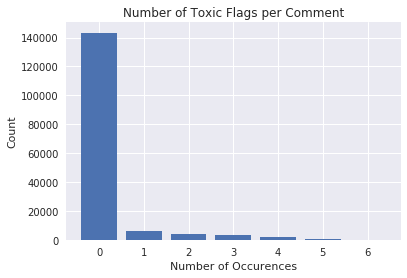

In [56]:
# get frequencies of number of toxic flags

freq_flags = {}
for i, freq in enumerate(df["toxic_count"].value_counts()):
    freq_flags[i] = freq
    
data = list(freq_flags.values())

fig, ax = plt.subplots()
index = np.arange(len(data))

ax.bar(index, data)
ax.set_xlabel('Number of Occurences')
ax.set_ylabel('Count')
ax.set_title('Number of Toxic Flags per Comment')
plt.show()

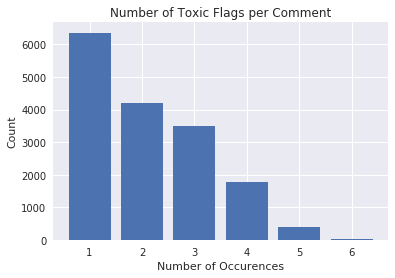

In [57]:
data = list(freq_flags.values())[1:]

fig, ax = plt.subplots()
index = np.arange(len(data))

ax.bar(index, data)
ax.set_xlabel('Number of Occurences')
ax.set_ylabel('Count')
ax.set_title('Number of Toxic Flags per Comment')
ax.set_xticks(index)
ax.set_xticklabels(('1', '2', '3', '4', '5','6'))
plt.show()

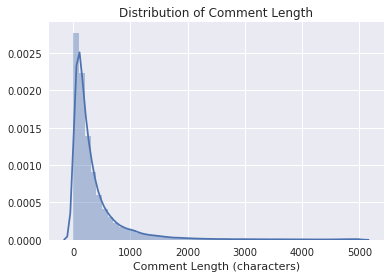

In [58]:
ax = sns.distplot(df["comment_length"])
ax.set_title('Distribution of Comment Length');
ax.set_xlabel('Comment Length (characters)');
plt.show()

In [59]:
# DONT RUN

'''# try to get ride of weird tokens (ie. \n)

from html.parser import HTMLParser
import html

print(df["comment_text"][0])
html.unescape(df["comment_text"][0])
#html_parser.unescape(original_tweet)''';

In [60]:
# LINK: https://www.kdnuggets.com/2017/12/general-approach-preprocessing-text-data.html

# start here for overview of common approaches to text mining, but don't need to follow exactly. see below steps for
# work that ive done

# LONG BUT V PRACTICAL COLLECTION OF SNIPPETS:

# http://www.nltk.org/book/ch03.html
# https://www.analyticsvidhya.com/blog/2014/11/text-data-cleaning-steps-python/

# GOOD FRAMEWORK TO LOOK INTO (FIRST ONE IS BETTER)
# http://www.nltk.org
# https://pypi.python.org/pypi/textmining/1.0

In [76]:
# Create bag of words sparse matrix with unigrams and bigrams
# BASED ON: https://nlp.stanford.edu/pubs/sidaw12_simple_sentiment.pdf
# from: https://www.kaggle.com/jhoward/nb-svm-strong-linear-baseline

# TODO: predict based on tokenized sparse matrix as an alternate approach to predicting just on engineered features
# ie. two boxes down, we build a whole whack of features to predict on, which cant be combined with this matrix. 
# Both approaches should be explored

re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')

def tokenize(s): return re_tok.sub(r' \1 ', s).split()

# READ THESE DOCS FOR DETAILS ON THIS
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

# THIS IS WHAT THIS DOES
# https://en.wikipedia.org/wiki/Tf–idf
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize, stop_words='english',
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1)

df_tokenized = vec.fit_transform(df['comment_text'])

In [62]:
#vec.get_feature_names() shows all tokens, doesn't hold caps etc.

In [77]:
df_tokenized

<159571x326105 sparse matrix of type '<class 'numpy.float64'>'
	with 9291686 stored elements in Compressed Sparse Row format>

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 20 columns):
id                       159571 non-null object
comment_text             159571 non-null object
toxic                    159571 non-null int64
severe_toxic             159571 non-null int64
obscene                  159571 non-null int64
threat                   159571 non-null int64
insult                   159571 non-null int64
identity_hate            159571 non-null int64
capitals                 159571 non-null int64
comment_length           159571 non-null int64
caps_vs_length           159571 non-null float64
num_exclamation_marks    159571 non-null int64
num_question_marks       159571 non-null int64
num_punctuation          159571 non-null int64
num_symbols              159571 non-null int64
num_words                159571 non-null int64
num_unique_words         159571 non-null int64
words_vs_unique          159571 non-null float64
num_smilies              159571 non-n

In [152]:
target_features = ['is_toxic?', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [177]:
# look into character tokenization as further refinement of above process, but see above link for details on predicting
# adapted from: https://www.kaggle.com/tunguz/logistic-regression-with-words-and-char-n-grams/code
# look out this will take a long time to run, needs more work
'''
for feature in target_features:
    print('Training classifier for  '+ feature)
    df_target = df[feature]
    classifier = LogisticRegression(solver='sag')
    cv_score = np.mean(cross_val_score(classifier, df_tokenized, df_target))
    classifier.fit(df_tokenized, df_target)
'''


"\nfor feature in target_features:\n    print('Training classifier for  '+ feature)\n    df_target = df[feature]\n    classifier = LogisticRegression(solver='sag')\n    cv_score = np.mean(cross_val_score(classifier, df_tokenized, df_target))\n    classifier.fit(df_tokenized, df_target)\n"

In [148]:
## FEATURES ##

## all features from kaggle: https://www.kaggle.com/eikedehling/feature-engineering
df['capitals'] = df['comment_text'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
df['caps_vs_length'] = df.apply(lambda row: float(row['capitals'])/float(row['comment_length']),axis=1)
df['num_exclamation_marks'] = df['comment_text'].apply(lambda comment: comment.count('!'))
df['num_question_marks'] = df['comment_text'].apply(lambda comment: comment.count('?'))
df['num_punctuation'] = df['comment_text'].apply(
    lambda comment: sum(comment.count(w) for w in '.,;:'))
df['num_symbols'] = df['comment_text'].apply(
    lambda comment: sum(comment.count(w) for w in '*&$%'))
df['num_words'] = df['comment_text'].apply(lambda comment: len(comment.split()))
df['num_unique_words'] = df['comment_text'].apply(
    lambda comment: len(set(w for w in comment.split())))
df['words_vs_unique'] = df['num_unique_words'] / df['num_words']
df['num_smilies'] = df['comment_text'].apply(
    lambda comment: sum(comment.count(w) for w in (':-)', ':)', ';-)', ';)')))

#Add count of curses from curses library
'''df['num_curses'] = df['comment_text'].apply(
    lambda comment: sum(
        comment.count(w) for w in curses))
'''


"df['num_curses'] = df['comment_text'].apply(\n    lambda comment: sum(\n        comment.count(w) for w in curses))\n"

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [171]:
def train_model(features, targets):
    # train model based on training set
    clf = GradientBoostingClassifier(n_estimators=500, max_depth=4, min_samples_split=2, learning_rate=0.01)    
    clf.fit(features, targets)
    return clf

def predict(dataset):
    # adapted from own work and 
    # http://scikit-learn.org/stable/auto_examples/multioutput/plot_classifier_chain_yeast.html#sphx-glr-auto-examples-multioutput-plot-classifier-chain-yeast-py
    
    #prep dataset for prediction
    dataset_notext = dataset.copy().drop('comment_text', axis = 1)
    
    # define test and training sets minus text fields
    naive_train, naive_test = train_test_split(dataset_notext,test_size=0.25)
    print('test and training sets split')
    
    #extract alphanumeric id string from features
    train_ids = naive_train['id']
    test_ids = naive_test['id']
    train_features = naive_train.drop('id', axis=1) #replace Loan status with target feature
    test_features = naive_test.drop('id', axis=1)
    
    # extract feature from training & testing set set
    print(target_features)
    
    for feature in target_features:
        print(feature)
        train_features.drop(columns = feature, inplace = True) #replace Loan status with target feature
        test_features.drop(columns = feature, inplace = True)
    print('dropped target features')
    
    #extract target values from training & testing set set
    train_targets = naive_train.loc[:,target_features]
    test_targets = naive_test.loc[:,target_features]
            
    # train model based on training set
    predictions  = pd.DataFrame()
    n = 0
    s = ""
    for feature in target_features:
        #train and predict model on each feature
        print('training model for ' + feature)
        clf = train_model(train_features, train_targets[feature])
        predictions[feature] = clf.predict(test_features)
        acc = accuracy_score(test_targets[feature], predictions[feature])
        s = s + "\n"+feature+" Prediction Accuracy: " + str(acc)
    print('models trained') 
    print(s)

predict(df.sample(4000))

test and training sets split
['is_toxic?', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
is_toxic?
toxic
severe_toxic
obscene
threat
insult
identity_hate
dropped target features
training model for is_toxic?
training model for toxic
training model for severe_toxic
training model for obscene
training model for threat
training model for insult
training model for identity_hate
models trained

is_toxic? Prediction Accuracy: 0.9
toxic Prediction Accuracy: 0.904
severe_toxic Prediction Accuracy: 0.982
obscene Prediction Accuracy: 0.94
threat Prediction Accuracy: 0.993
insult Prediction Accuracy: 0.948
identity_hate Prediction Accuracy: 0.986


In [ ]:
# look to this for basic correlation stuff:
# https://www.kaggle.com/djcarlos/exploring-the-toxicity-of-wikipedia-comments